In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
churn_master_df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv')

In [3]:
churn_df = churn_master_df.copy()

In [4]:
churn_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


# Data Information


customerID - Customer ID

Gender - Male or Female

SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)

tenure - Number of months the customer has stayed with the company

ServiceCount - Number of services/product customer has availed

Contract - The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)

MonthlyCharges - The amount charged to the customer monthly

TotalCharges - The total amount charged to the customer

Churn - Whether the customer churned or not (Yes or No)


In [5]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
tenure              7043 non-null int64
ServiceCount        7043 non-null int64
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7016 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


In [7]:
churn_df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
tenure               0
ServiceCount         0
Contract             0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        27
Churn                0
dtype: int64

In [8]:
print ("Rows     : " ,churn_df.shape[0])
print ("Columns  : " ,churn_df.shape[1])
print ("\nFeatures : \n" ,churn_df.columns.tolist())
print(" \n Missing Value", churn_df.isnull().any())
print ("\nUnique values :  \n",churn_df.nunique())

Rows     :  7043
Columns  :  10

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'tenure', 'ServiceCount', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']
 
 Missing Value customerID          False
gender              False
SeniorCitizen       False
tenure              False
ServiceCount        False
Contract            False
PaperlessBilling    False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
tenure                73
ServiceCount           9
Contract               3
PaperlessBilling       2
MonthlyCharges      1585
TotalCharges        6514
Churn                  2
dtype: int64


In [10]:
churn_df[churn_df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No


In [11]:
churn_df[churn_df['tenure']==0]


,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No
3331,7644-OMVMY,Male,0,0,7,Two year,No,19.85,NaN,No
3826,3213-VVOLG,Male,0,0,8,Two year,No,25.35,NaN,No
4380,2520-SGTTA,Female,0,0,7,Two year,No,20.00,NaN,No
5218,2923-ARZLG,Male,0,0,7,One year,Yes,19.70,NaN,No
6670,4075-WKNIU,Female,0,0,7,Two year,No,73.35,NaN,No


In [12]:
churn_df['TotalCharges'].describe()

count    7016.000000
mean     2282.589168
std      2265.506114
min        18.800000
25%       401.925000
50%      1397.100000
75%      3792.325000
max      8684.800000
Name: TotalCharges, dtype: float64

In [13]:
churn_df[churn_df['Churn']=='No'].describe()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
count,5174.000000,5174.000000,5174.000000,5174.000000,5147.000000
mean,0.128721,37.569965,5.811751,61.265124,2555.220264
std,0.334923,24.113777,1.890418,31.092648,2328.034938
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,0.000000,15.000000,4.000000,25.100000,579.200000
50%,0.000000,38.000000,6.000000,64.425000,1685.900000
75%,0.000000,61.000000,7.000000,88.400000,4263.725000
max,1.000000,72.000000,9.000000,118.750000,8672.450000


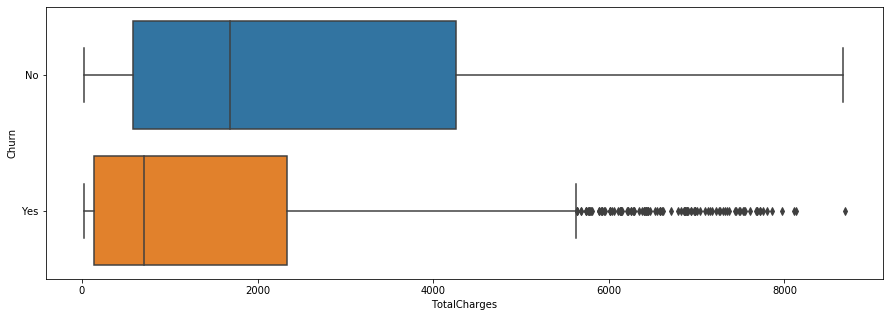

In [14]:
plt.figure(figsize=(15,5))
sns.boxplot(x="TotalCharges", y="Churn", data=churn_df)

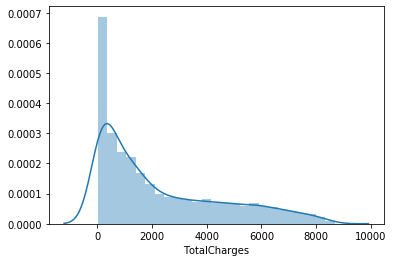

In [57]:
churn_df=churn_df.dropna()
sns.distplot(churn_df['TotalCharges'].apply(int), hist=True)

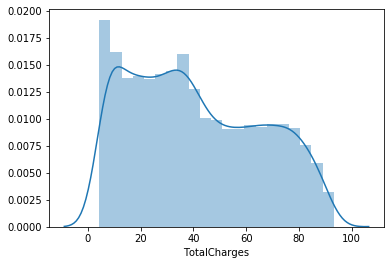

In [58]:

sns.distplot(churn_df['TotalCharges'].apply(np.sqrt), hist=True)

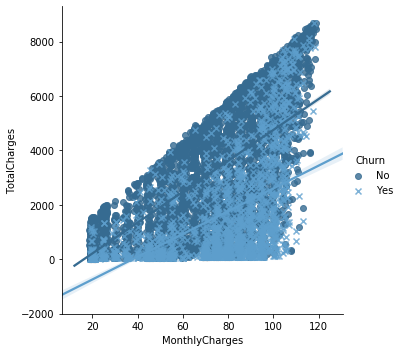

In [17]:
sns.lmplot(x='MonthlyCharges',y='TotalCharges',data=churn_df,fit_reg=True, hue="Churn", markers=["o", "x"], palette="Blues_d")

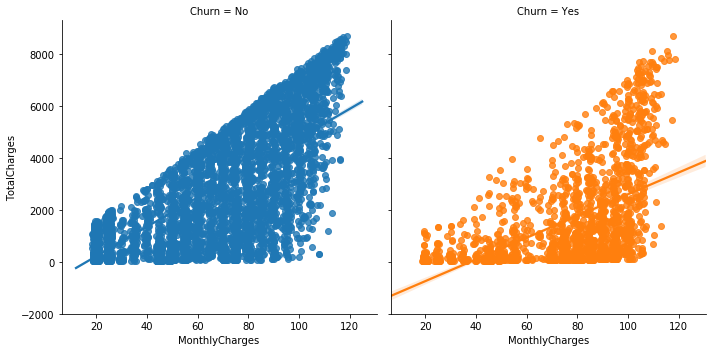

In [18]:
sns.lmplot(x='MonthlyCharges',y='TotalCharges',data=churn_df,fit_reg=True, col="Churn", hue="Churn")

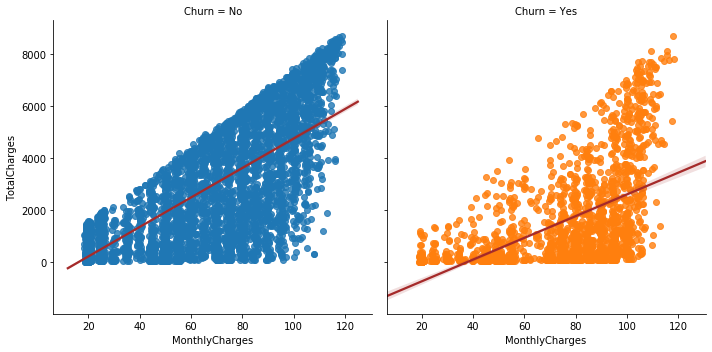

In [20]:
sns.lmplot(x='MonthlyCharges',y='TotalCharges',data=churn_df,fit_reg=True, col="Churn", hue="Churn", line_kws={'color':'brown'})

In [21]:
churn_df[['TotalCharges','MonthlyCharges']].corr()

,TotalCharges,MonthlyCharges
TotalCharges,1.000000,0.650964
MonthlyCharges,0.650964,1.000000


In [22]:
churn_df[churn_df['Churn']=='No'][['TotalCharges','MonthlyCharges']].corr()

,TotalCharges,MonthlyCharges
TotalCharges,1.00000,0.75739
MonthlyCharges,0.75739,1.00000


In [23]:
churn_no_df=churn_df[(churn_df['Churn']=='No') & (churn_df['TotalCharges'].isna()==False)]
churn_no_df.shape[0]

5147

In [24]:
churn_no_df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
tenure              False
ServiceCount        False
Contract            False
PaperlessBilling    False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [25]:
from scipy import stats
slope, intercept, r_value, p_value, std_err=stats.linregress(churn_no_df['MonthlyCharges'],churn_no_df['TotalCharges'])

In [27]:
print ("slope     : " ,slope)
print ("intercept  : " ,intercept)
print ("r_value :  " ,r_value)
print ("p_value :  ", p_value)
print ("std_err :  ",std_err)
print("R-squared: ",  r_value**2)

slope     :  56.73637552696062
intercept  :  -922.8160085118097
r_value :   0.7573902887184031
p_value :   0.0
std_err :   0.6819261867835151
R-squared:  0.573640049444946


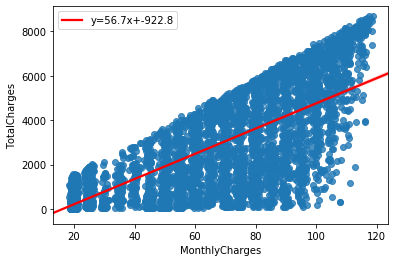

In [28]:
ax=sns.regplot(x='MonthlyCharges', y='TotalCharges', data=churn_no_df, line_kws={'color':'red','label':'y={0:.1f}x+{1:.1f}'.format(slope,intercept)})
ax.legend(loc="best")

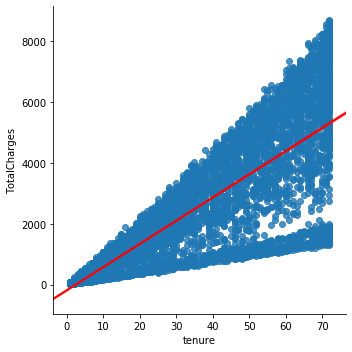

In [29]:
sns.lmplot(x='tenure',y='TotalCharges',data=churn_df,fit_reg=True, line_kws={'color':'red'})

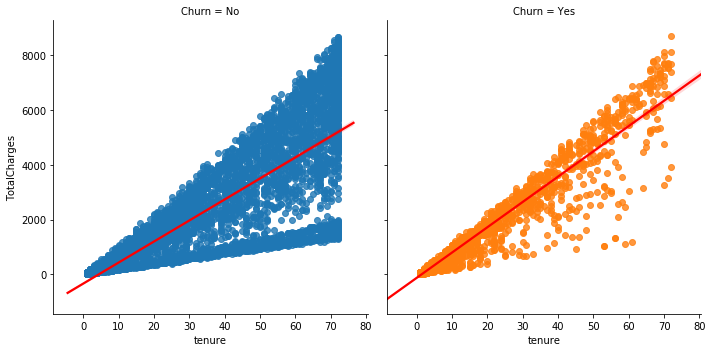

In [30]:
sns.lmplot(x='tenure',y='TotalCharges',data=churn_df,fit_reg=True, col="Churn", hue="Churn", line_kws={'color':'red'})

In [31]:
churn_df[['TotalCharges','tenure']].corr()

,TotalCharges,tenure
TotalCharges,1.000000,0.826066
tenure,0.826066,1.000000


In [32]:
churn_df[churn_df['Churn']=='No'][['TotalCharges','tenure']].corr()

,TotalCharges,tenure
TotalCharges,1.000000,0.793288
tenure,0.793288,1.000000


In [33]:
slope, intercept, r_value, p_value, std_err=stats.linregress(churn_no_df['tenure'],churn_no_df['TotalCharges'])

In [34]:
print ("slope     : " ,slope)
print ("intercept  : " ,intercept)
print ("r_value :  " ,r_value)
print ("p_value :  ", p_value)
print ("std_err :  ",std_err)
print("R-squared: ",  r_value**2)

slope     :  76.74259761920021
intercept  :  -334.08560506046933
r_value :   0.7932877280232581
p_value :   0.0
std_err :   0.8211475250987231
R-squared:  0.6293054194323027


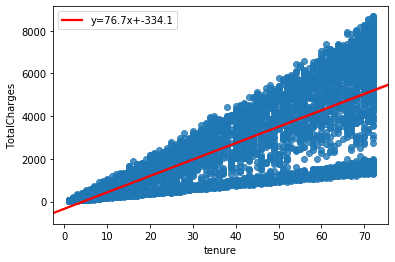

In [35]:
ax=sns.regplot(x='tenure', y='TotalCharges', data=churn_no_df, line_kws={'color':'red','label':'y={0:.1f}x+{1:.1f}'.format(slope,intercept)})
ax.legend(loc="best")

In [36]:
churn_no_df['tenure_charges']=churn_no_df['tenure']*churn_no_df['MonthlyCharges']

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
churn_no_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,tenure_charges
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No,29.85
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No,1936.30
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No,1903.50
6,1452-KIOVK,Male,0,22,5,Month-to-month,Yes,89.10,1949.40,No,1960.20
7,6713-OKOMC,Female,0,10,2,Month-to-month,No,29.75,301.90,No,297.50


In [38]:
churn_no_df[churn_no_df['Churn']=='No'][['TotalCharges','tenure_charges']].corr()

,TotalCharges,tenure_charges
TotalCharges,1.000000,0.999535
tenure_charges,0.999535,1.000000


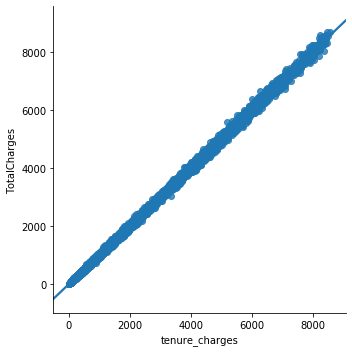

In [39]:
sns.lmplot(x='tenure_charges',y='TotalCharges',data=churn_no_df)

In [40]:
slope, intercept, r_value, p_value, std_err=stats.linregress(churn_no_df['tenure_charges'],churn_no_df['TotalCharges'])

In [41]:
print ("slope     : " ,slope)
print ("intercept  : " ,intercept)
print ("r_value :  " ,r_value)
print ("p_value :  ", p_value)
print ("std_err :  ",std_err)
print("R-squared: ",  r_value**2)

slope     :  1.0001720821518199
intercept  :  -0.30109836950259705
r_value :   0.9995350350972918
p_value :   0.0
std_err :   0.0004253619242980525
R-squared:  0.9990702863869444


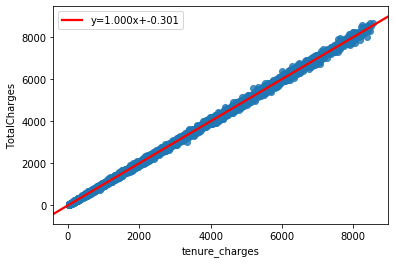

In [42]:
ax=sns.regplot(x='tenure_charges', y='TotalCharges', data=churn_no_df, line_kws={'color':'red','label':'y={0:.3f}x+{1:.3f}'.format(slope,intercept)})
ax.legend(loc="best")

In [43]:
def fillna(tenure, monthlycharge):
  if tenure == 0 :
    totcharges = monthlycharge
  else :
    totcharges = tenure * monthlycharge
    totcharges = intercept+(totcharges*slope)
  return round(totcharges,2)

In [44]:
churn_df['TotChargeNew'] = churn_df.apply(lambda x: x['TotalCharges'] if not pd.isna(x['TotalCharges']) else fillna(x['tenure'],x['MonthlyCharges']), axis=1)

In [45]:
churn_df[churn_df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotChargeNew
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No,4694.91
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No,52.55
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No,20.25
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No,80.85
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No,25.75
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No,160.03
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No,3225.25
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No,56.05
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No,5981.53
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No,356.96


In [46]:
churn_actual_df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_actual.csv')

In [47]:
churn_merged=pd.merge(churn_df, churn_actual_df)

In [48]:
churn_merged[churn_merged.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotChargeNew,TotChargesAct
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No,4694.91,4784.45
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No,52.55,
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No,20.25,
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No,80.85,
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No,25.75,
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No,160.03,194.55
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No,3225.25,3242.5
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No,56.05,
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No,5981.53,5914.4
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No,356.96,279.2
